# Loading UCI data for car efficiency given different factors

In [72]:
import pandas as pd 
import scipy 
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np
import seaborn as sns
import statsmodels.api as sm

In [73]:
auto_mpg = fetch_ucirepo(id=9) 


In [74]:
# data (as pandas dataframes) 
X = auto_mpg.data.features 
y = auto_mpg.data.targets 


  

In [75]:
print(X.shape)

(398, 7)


In [76]:
# variable information 
print(auto_mpg.variables) 

           name     role         type demographic description units  \
0  displacement  Feature   Continuous        None        None  None   
1           mpg   Target   Continuous        None        None  None   
2     cylinders  Feature      Integer        None        None  None   
3    horsepower  Feature   Continuous        None        None  None   
4        weight  Feature   Continuous        None        None  None   
5  acceleration  Feature   Continuous        None        None  None   
6    model_year  Feature      Integer        None        None  None   
7        origin  Feature      Integer        None        None  None   
8      car_name       ID  Categorical        None        None  None   

  missing_values  
0             no  
1             no  
2             no  
3            yes  
4             no  
5             no  
6             no  
7             no  
8             no  


## Visualizing and cleaning up the data

In [77]:
X.describe()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,193.425879,5.454774,104.469388,2970.424623,15.568090,76.010050,1.572864
std,104.269838,1.701004,38.491160,846.841774,2.757689,3.697627,0.802055
min,68.000000,3.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,104.250000,4.000000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,148.500000,4.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,262.000000,8.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,455.000000,8.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [78]:
y.describe()

,mpg
count,398.000000
mean,23.514573
std,7.815984
min,9.000000
25%,17.500000
50%,23.000000
75%,29.000000
max,46.600000


In [79]:
consolidated_data = pd.merge(X,y, left_index=True,right_index=True)
consolidated_data

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,mpg
0,307.0,8,130.0,3504,12.0,70,1,18.0
1,350.0,8,165.0,3693,11.5,70,1,15.0
2,318.0,8,150.0,3436,11.0,70,1,18.0
3,304.0,8,150.0,3433,12.0,70,1,16.0
4,302.0,8,140.0,3449,10.5,70,1,17.0
...,...,...,...,...,...,...,...,...
393,140.0,4,86.0,2790,15.6,82,1,27.0
394,97.0,4,52.0,2130,24.6,82,2,44.0
395,135.0,4,84.0,2295,11.6,82,1,32.0
396,120.0,4,79.0,2625,18.6,82,1,28.0


In [80]:
#how much data are we missing we should take two views a row view and a column view:

#column view of the data we are missing 

for col in consolidated_data.columns:
    col_series = consolidated_data[col]
    col_length = col_series.shape[0]
    undefined = sum(col_series.isna())
    print(f"Percent of {col} values NaN = {undefined/col_length:.3f}%")





Percent of displacement values NaN = 0.000%
Percent of cylinders values NaN = 0.000%
Percent of horsepower values NaN = 0.015%
Percent of weight values NaN = 0.000%
Percent of acceleration values NaN = 0.000%
Percent of model_year values NaN = 0.000%
Percent of origin values NaN = 0.000%
Percent of mpg values NaN = 0.000%


In [81]:
# row view of data we are missing
ill_defined = 0

for index, row in consolidated_data.iterrows():
    length = row.shape[0]
    undefined = sum(row.isna())
    if undefined:
        ill_defined+=1

print(f"Percent of rows with at least one value missing = {ill_defined/consolidated_data.shape[0]:.2f}")
    


Percent of rows with at least one value missing = 0.02


### Clearly the amount of missing values we have is minimal we don't have to do any kind of crazy imputation we can keep working here

In [82]:
#clearly there were some rows that had undefined values as you can see the number of rows dropped to 392
#perhaps there were MPGs that were undefined 
consolidated_data = consolidated_data.dropna(how='any', axis=0)
consolidated_data

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,mpg
0,307.0,8,130.0,3504,12.0,70,1,18.0
1,350.0,8,165.0,3693,11.5,70,1,15.0
2,318.0,8,150.0,3436,11.0,70,1,18.0
3,304.0,8,150.0,3433,12.0,70,1,16.0
4,302.0,8,140.0,3449,10.5,70,1,17.0
...,...,...,...,...,...,...,...,...
393,140.0,4,86.0,2790,15.6,82,1,27.0
394,97.0,4,52.0,2130,24.6,82,2,44.0
395,135.0,4,84.0,2295,11.6,82,1,32.0
396,120.0,4,79.0,2625,18.6,82,1,28.0


## Let's visualize all the data to get a sense of their distributions

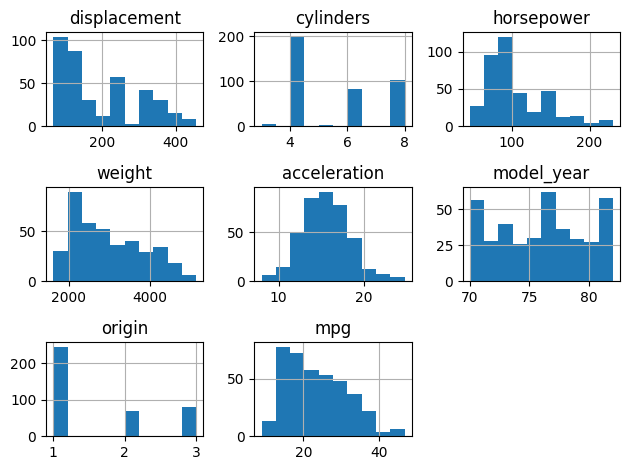

In [83]:
#clearly we have cylinders, origing and model year as categorical variables 
#all the distributions seem to be left tailed makes sense for there to be less car makes for large cars than small ones
consolidated_data.hist()
plt.tight_layout()


In [84]:
#certainly no extreme values of y that we have to drop remove for our regression, that's ok then we can get to further analyzing our data

In [85]:
#let's clean the data normalize and then let's go through our tests 

In [86]:
categorial_columns = ["origin", "model_year", "cylinders"]

continuous_columns = [col for col in consolidated_data.columns if col not in categorial_columns and col != "mpg"]
print(continuous_columns)

['displacement', 'horsepower', 'weight', 'acceleration']


In [87]:
continuous_df = consolidated_data[continuous_columns]
rest_df = consolidated_data[categorial_columns+["mpg"]]

In [88]:
scaler = StandardScaler()

standardized_continuous_df = pd.DataFrame(scaler.fit_transform(continuous_df), columns=continuous_columns)

In [89]:
consolidated_data = pd.merge(standardized_continuous_df, rest_df, left_index=True, right_index=True)
consolidated_data

,displacement,horsepower,weight,acceleration,origin,model_year,cylinders,mpg
0,1.077290,0.664133,0.620540,-1.285258,1,70,8,18.0
1,1.488732,1.574594,0.843334,-1.466724,1,70,8,15.0
2,1.182542,1.184397,0.540382,-1.648189,1,70,8,18.0
3,1.048584,1.184397,0.536845,-1.285258,1,70,8,16.0
4,1.029447,0.924265,0.555706,-1.829655,1,70,8,17.0
...,...,...,...,...,...,...,...,...
387,-0.520637,-0.480448,-0.221125,0.021294,1,82,6,38.0
388,-0.932079,-1.364896,-0.999134,3.287676,1,82,4,26.0
389,-0.568479,-0.532474,-0.804632,-1.430430,1,82,6,22.0
390,-0.712005,-0.662540,-0.415627,1.110088,3,82,4,32.0


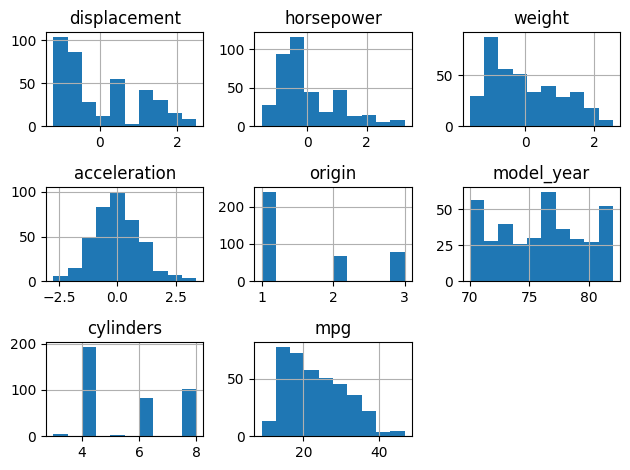

In [90]:
consolidated_data.hist()
plt.tight_layout()

In [91]:
### Now we need to make our categorial variables correctly informed

consolidated_data = pd.get_dummies(consolidated_data, columns=categorial_columns, drop_first=True, dtype=float)
consolidated_data

,displacement,horsepower,weight,acceleration,mpg,origin_2,origin_3,model_year_71,model_year_72,model_year_73,...,model_year_77,model_year_78,model_year_79,model_year_80,model_year_81,model_year_82,cylinders_4,cylinders_5,cylinders_6,cylinders_8
0,1.077290,0.664133,0.620540,-1.285258,18.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.488732,1.574594,0.843334,-1.466724,15.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.182542,1.184397,0.540382,-1.648189,18.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.048584,1.184397,0.536845,-1.285258,16.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.029447,0.924265,0.555706,-1.829655,17.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,-0.520637,-0.480448,-0.221125,0.021294,38.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
388,-0.932079,-1.364896,-0.999134,3.287676,26.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
389,-0.568479,-0.532474,-0.804632,-1.430430,22.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
390,-0.712005,-0.662540,-0.415627,1.110088,32.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [92]:
### Now we need to test our OLS assumptions to see if they hold ok 

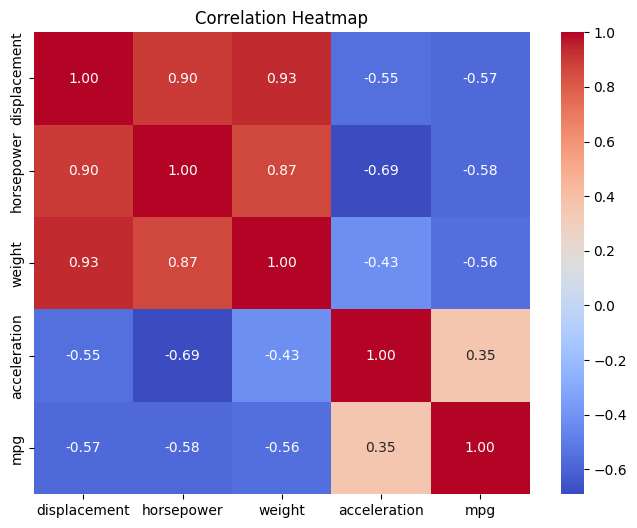

In [93]:
corr_matrix = consolidated_data[continuous_columns+["mpg"]].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [94]:
## wow so there you can already see that there's tonnes of problems with this regression in terms of the values they're super related

In [95]:
# so quite clearly we want to think about how we can solve the multicollinearity issue:

In [96]:
#Let's do VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

raw_features = consolidated_data[continuous_columns]
raw_features['Intercept'] = 1

vif_data = pd.DataFrame()
vif_data['feature'] = raw_features.columns
vif_data['VIF'] = [variance_inflation_factor(raw_features.values, i) for i in range(raw_features.shape[1])]

vif_data

/var/folders/cf/zk37hd_50bv_nlrdlxrb4q3r0000gn/T/ipykernel_34633/563790022.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_features['Intercept'] = 1


,feature,VIF
0,displacement,10.904922
1,horsepower,8.862781
2,weight,10.374694
3,acceleration,2.583196
4,Intercept,1.000037


In [97]:
#now what if we drop dispalcement, weight do we look better?
#Let's do VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

raw_features = consolidated_data[continuous_columns]
raw_features = raw_features.drop(columns=["weight"])
raw_features['Intercept'] = 1

vif_data = pd.DataFrame()
vif_data['feature'] = raw_features.columns
vif_data['VIF'] = [variance_inflation_factor(raw_features.values, i) for i in range(raw_features.shape[1])]

vif_data

,feature,VIF
0,displacement,5.507372
1,horsepower,7.372598
2,acceleration,2.023427
3,Intercept,1.000037


In [98]:
#now what if we drop dispalcement, weight do we look better?
#Let's do VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

raw_features = consolidated_data[continuous_columns]
raw_features = raw_features.drop(columns=["displacement"])
raw_features['Intercept'] = 1

vif_data = pd.DataFrame()
vif_data['feature'] = raw_features.columns
vif_data['VIF'] = [variance_inflation_factor(raw_features.values, i) for i in range(raw_features.shape[1])]

vif_data

,feature,VIF
0,horsepower,8.221011
1,weight,5.239588
2,acceleration,2.496594
3,Intercept,1.000037


In [99]:
#now what if we drop dispalcement, weight do we look better?
#Let's do VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

raw_features = consolidated_data[continuous_columns]
raw_features = raw_features.drop(columns=["horsepower"])
raw_features['Intercept'] = 1

vif_data = pd.DataFrame()
vif_data['feature'] = raw_features.columns
vif_data['VIF'] = [variance_inflation_factor(raw_features.values, i) for i in range(raw_features.shape[1])]

vif_data

,feature,VIF
0,displacement,10.115276
1,weight,8.630298
2,acceleration,1.566526
3,Intercept,1.000026


In [100]:
#now what if we drop dispalcement, weight do we look better?
#Let's do VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

raw_features = consolidated_data[continuous_columns]
raw_features = raw_features.drop(columns=["horsepower","displacement"])
raw_features['Intercept'] = 1

vif_data = pd.DataFrame()
vif_data['feature'] = raw_features.columns
vif_data['VIF'] = [variance_inflation_factor(raw_features.values, i) for i in range(raw_features.shape[1])]

vif_data

,feature,VIF
0,weight,1.221637
1,acceleration,1.221637
2,Intercept,1.000025


In [101]:
#Let's run our regression now with the following
regression_data = consolidated_data.drop(columns=["horsepower","displacement"])
regression_data = regression_data.sample(frac=1).reset_index(drop=True)
regression_data

,weight,acceleration,mpg,origin_2,origin_3,model_year_71,model_year_72,model_year_73,model_year_74,model_year_75,...,model_year_77,model_year_78,model_year_79,model_year_80,model_year_81,model_year_82,cylinders_4,cylinders_5,cylinders_6,cylinders_8
0,-0.550011,0.892329,18.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.324859,-0.740861,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.752191,-1.466724,14.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.014834,0.093881,19.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.881254,-0.377930,27.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,-0.993240,0.384226,16.2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
382,-1.226643,-0.486809,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
383,-0.450991,-1.539310,37.3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
384,-1.335093,-0.087585,44.6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [102]:
X = regression_data.drop(columns=["mpg"])

y = regression_data[["mpg"]]


X, X_test, y, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


X,y


(       weight  acceleration  origin_2  origin_3  model_year_71  model_year_72  \
 255 -0.839996     -0.123878       0.0       1.0            0.0            0.0   
 374  0.809149     -1.648189       0.0       1.0            0.0            0.0   
 363  1.134498     -0.922327       0.0       0.0            0.0            0.0   
 82  -0.716222     -0.922327       0.0       1.0            0.0            0.0   
 222 -0.262383      0.093881       0.0       0.0            0.0            0.0   
 ..        ...           ...       ...       ...            ...            ...   
 71   0.450793      0.384226       0.0       0.0            0.0            0.0   
 106 -1.211319      1.255261       0.0       0.0            0.0            0.0   
 270  0.354131      0.892329       0.0       0.0            0.0            0.0   
 348 -0.671427      1.255261       0.0       0.0            1.0            0.0   
 102  0.555706     -1.829655       0.0       0.0            0.0            0.0   
 
      model_ye

In [103]:
#Now running our regular OLS regression please 

X = sm.add_constant(X)
model = sm.OLS(endog=y, exog=X, cov_type='HC0').fit()

print(model.summary2(alpha=0.05))

/Users/nikhileshbelulkar/opt/miniconda3/envs/fingers_crossed/lib/python3.11/site-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['cov_type']
  warnings.warn(msg, ValueWarning)


                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.792    
Dependent Variable: mpg              AIC:                1670.8929
Date:               2025-09-15 15:46 BIC:                1749.2250
No. Observations:   308              Log-Likelihood:     -814.45  
Df Model:           20               F-statistic:        59.37    
Df Residuals:       287              Prob (F-statistic): 1.42e-89 
R-squared:          0.805            Scale:              12.445   
-------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
-------------------------------------------------------------------
const          14.9566    2.0771   7.2007  0.0000  10.8684  19.0449
weight         -0.7587    0.2670  -2.8422  0.0048  -1.2842  -0.2333
acceleration    0.1194    0.2345   0.5094  0.6109  -0.3421   0.5810
origin_2        1.3777    0.6980   1.9736  0.0494   0.0037   2.7516
origin

In [104]:
## how do we test for other things like serial correlation or 

from statsmodels.stats.diagnostic import het_breuschpagan

# Breusch-Pagan test
lm, lm_pvalue, fvalue, f_pvalue = het_breuschpagan(model.resid, X)
print(f"Breusch-Pagan test:")
print(f"LM statistic: {lm:.4f}")
print(f"LM test p-value: {lm_pvalue:.4f}")
print(f"F statistic: {fvalue:.4f}")
print(f"F test p-value: {f_pvalue:.4f}")


if lm_pvalue < 0.05:
    print("Reject null hypothesis: Heteroskedasticity is present")
else:
    print("Fail to reject null: Homoskedasticity (constant variance)")

Breusch-Pagan test:
LM statistic: 77.9093
LM test p-value: 0.0000
F statistic: 4.8589
F test p-value: 0.0000
Reject null hypothesis: Heteroskedasticity is present


In [105]:
from statsmodels.stats.stattools import jarque_bera

# Jarque-Bera test for normality of residuals
jb_stat, jb_pvalue, skew, kurtosis = jarque_bera(model.resid)
print(f"Jarque-Bera test:")
print(f"JB statistic: {jb_stat:.4f}")
print(f"p-value: {jb_pvalue:.4f}")
print(f"Skewness: {skew:.4f}")
print(f"Kurtosis: {kurtosis:.4f}")

Jarque-Bera test:
JB statistic: 25.6885
p-value: 0.0000
Skewness: 0.4868
Kurtosis: 4.0265


In [108]:
## out of sample R^2

y_pred_test = model.predict(sm.add_constant(X_test))



oos_r2_score = r2_score(y_test, y_pred_test)

print(f"OOS R^2 = {oos_r2_score}")

OOS R^2 = 0.8144954702248557
